In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [9]:
diabetes = pd.read_csv("Diabetes.csv")

In [10]:
diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [11]:
print(diabetes.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [12]:
#for first 5 rows
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [13]:
#for last 5 rows
diabetes.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1
253679,2,1,1,1,25,0,0,1,1,1,...,1,0,2,0,0,0,0,9,6,2


In [14]:
#no of rows and columns
diabetes.shape

(253680, 22)

In [15]:
#getting info about data
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [16]:
diabetes.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [17]:
#statistical measures about the data
diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [18]:
#checking the distribution of target variable
diabetes['Diabetes_012'].value_counts()

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64

In [19]:
x=diabetes.drop(columns='Diabetes_012',axis=1)
y=diabetes['Diabetes_012']

In [20]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    2
253677    0
253678    0
253679    2
Name: Diabetes_012, Length: 253680, dtype: int64


In [21]:
print(x)

        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   40       1       0   
1            0         0          0   25       1       0   
2            1         1          1   28       0       0   
3            1         0          1   27       0       0   
4            1         1          1   24       0       0   
...        ...       ...        ...  ...     ...     ...   
253675       1         1          1   45       0       0   
253676       1         1          1   18       0       0   
253677       0         0          1   28       0       0   
253678       1         0          1   23       0       0   
253679       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                          0             0       0        1  ...   
1                          0             1       0        0  ...   
2                          0             0       1        0  ...   
3      

In [22]:
# Checking duplicates
duplicate = diabetes[diabetes.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  23899


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2,1,1,1,27,1,0,0,0,0,...,1,0,5,0,30,1,0,10,4,5
1563,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
2700,0,0,0,1,32,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8
3160,0,0,0,1,21,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
3332,0,0,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,1,9,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2,1,1,1,33,0,0,0,1,1,...,1,0,3,0,0,0,1,9,6,6
253550,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,7,6,8
253563,0,0,1,1,24,1,0,0,1,1,...,1,0,2,0,0,0,1,8,6,8
253597,0,0,0,1,24,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8


In [23]:
# Removing duplicate rows from the dataset
diabetes.drop_duplicates(inplace = True)

In [24]:
duplicate = diabetes[diabetes.duplicated()]
print("Duplicate Rows : ", len(duplicate))

Duplicate Rows :  0


In [25]:
# in our dataset the label is diabetes column
# This will return the label distribution count
diabetes['Diabetes_012'].value_counts()

Diabetes_012
0    190055
2     35097
1      4629
Name: count, dtype: int64

<Axes: >

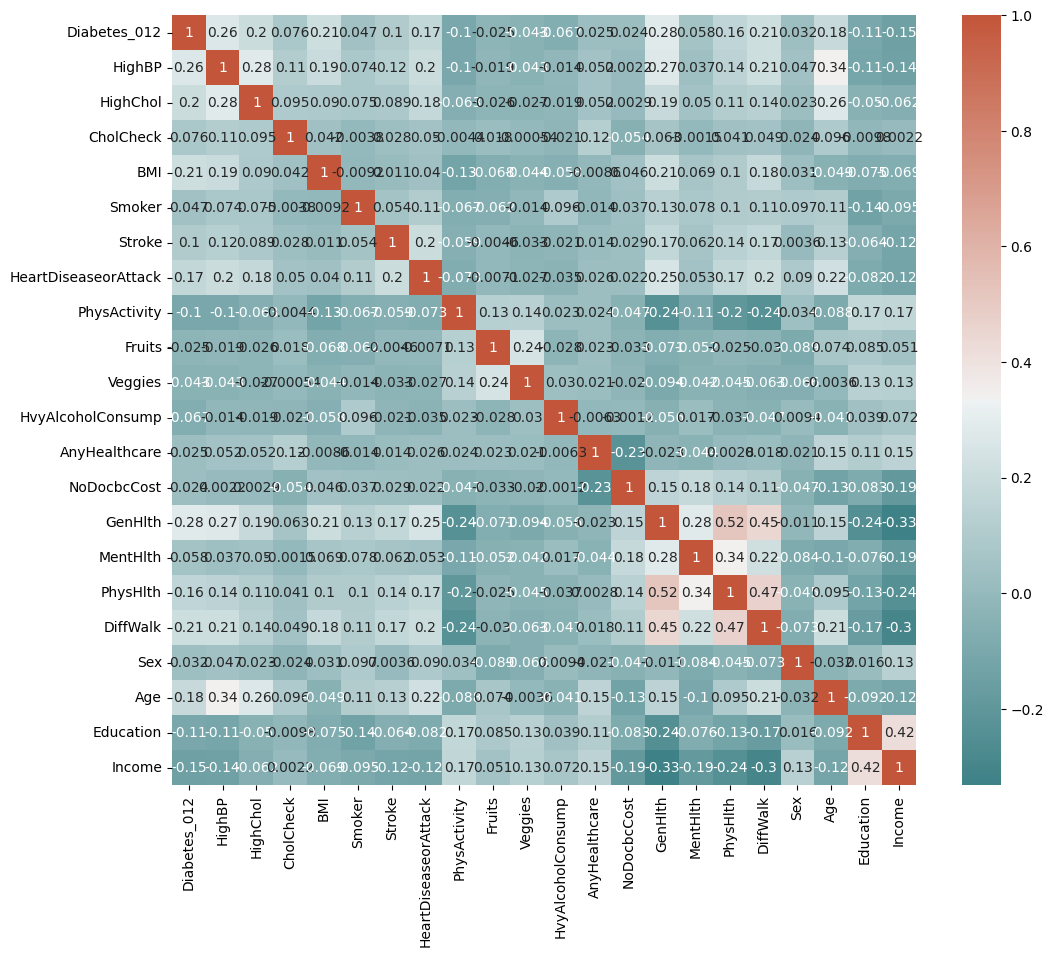

In [26]:
#correlation matrix
#it is to find the dependency of column to target value
corr = diabetes.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

<Axes: title={'center': 'Label Distribution'}, xlabel='Diabetes_012'>

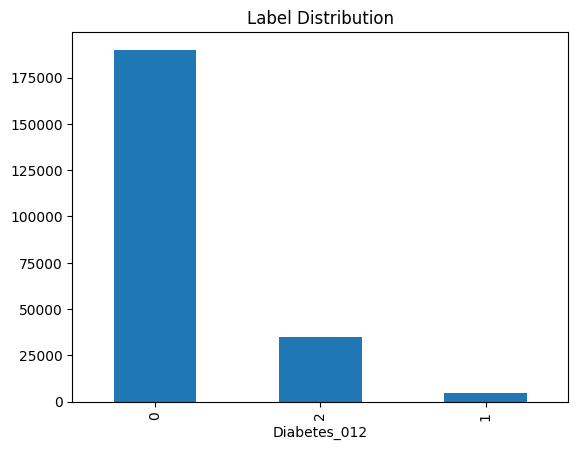

In [27]:
# plotting the label distribution
diabetes['Diabetes_012'].value_counts().plot(kind = 'bar', title = 'Label Distribution')

<Axes: title={'center': 'Label Distribution after Oversampling'}, xlabel='Diabetes_012'>

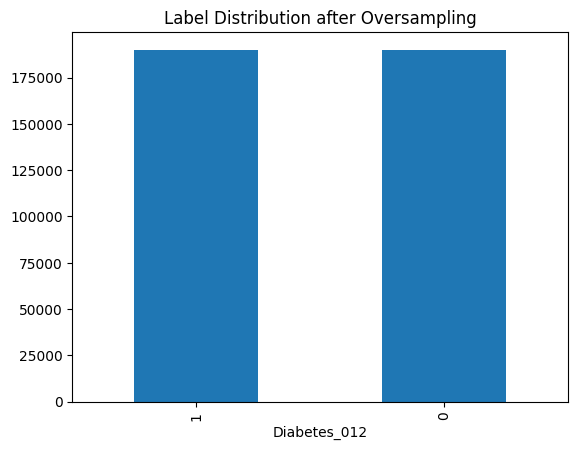

In [28]:
# over sampling of the dataset to get a balanced dataset
class_0 = diabetes[diabetes['Diabetes_012'] == 0]
class_1 = diabetes[diabetes['Diabetes_012'] == 1]
# over sampling of the minority class 1
class_1_over = class_1.sample(len(class_0), replace=True)
# Creating a new dataframe with over sampled class 1 df and class 0 df
df_new = pd.concat([class_1_over, class_0], axis=0)
# plotting the new label distribution
df_new['Diabetes_012'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

In [76]:
X = df_new.iloc[:,1:20] # features
y = df_new[['Diabetes_012']] # labels
# splitting the features and labels into train and test with test size = 20% and train size = 80%
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10)

In [79]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
105471,1,0,1,40,1,0,0,1,1,1,0,1,1,5,3,30,1,0,6
20835,1,0,1,31,0,0,0,0,0,0,0,1,0,3,5,0,0,0,10
193539,1,0,1,24,1,0,1,0,0,0,0,0,1,5,15,30,1,1,7
156066,1,0,1,26,0,0,0,1,0,0,0,1,0,3,0,0,0,0,8
251153,1,0,1,32,0,0,0,0,0,1,0,1,0,3,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,1,0,1,42,0,0,0,1,1,1,0,1,0,3,14,4,0,1,3
253674,0,0,1,27,0,0,0,0,0,1,0,1,0,1,0,0,0,0,3
253675,1,1,1,45,0,0,0,0,1,1,0,1,0,3,0,5,0,1,5
253677,0,0,1,28,0,0,0,1,1,0,0,1,0,1,0,0,0,0,2


In [80]:
#random forest
model_1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                             min_samples_split=10, random_state=0)
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)

In [81]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
68436,0,0
81745,1,1
103109,0,0
17283,0,0
112954,1,1
...,...,...
115639,0,0
111825,1,1
188251,1,1
12763,0,0


In [82]:
# calculating the accuracy of the model
accuracies = {}
accuracy_1 = accuracy_score(y_test, predictions)
accuracies['Random Forest Classifier'] = accuracy_1
# calculating the classification report
classificationreport = classification_report(y_test, predictions)
# calculating the mse
mse = mean_squared_error(y_test, predictions)
# calculating the rmse
rmse = math.sqrt(mse)
print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy_1*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Random Forest Classifier : 99.01

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37935
           1       0.98      1.00      0.99     38087

    accuracy                           0.99     76022
   macro avg       0.99      0.99      0.99     76022
weighted avg       0.99      0.99      0.99     76022


**************************************************

Mean squared error : 0.009852411144142485

**************************************************

Root mean squared error : 0.09925931263182555


Confusion Matrix for Random Forest Classifier


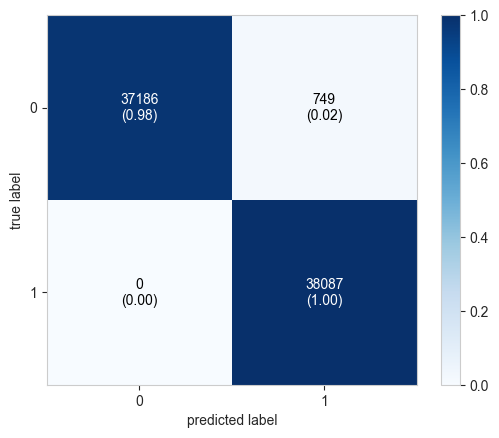

In [83]:
print('Confusion Matrix for Random Forest Classifier')
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [84]:
#logistic regression
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)

In [85]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
68436,0,0
81745,1,1
103109,0,0
17283,0,0
112954,1,1
...,...,...
115639,0,0
111825,1,1
188251,1,1
12763,0,0


In [86]:
# calculating the accuracy of the model
accuracy_2 = accuracy_score(y_test, predictions)
accuracies['Logistic Regression'] = accuracy_2
# calculating the classification report
classificationreport = classification_report(y_test, predictions)
# calculating the mse
mse = mean_squared_error(y_test, predictions)
# calculating the rmse
rmse = math.sqrt(mse)
print('\nAccuracy score of Logistic Regression : ' + str(round(accuracy_2*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Logistic Regression : 67.19

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.68      0.65      0.66     37935
           1       0.66      0.70      0.68     38087

    accuracy                           0.67     76022
   macro avg       0.67      0.67      0.67     76022
weighted avg       0.67      0.67      0.67     76022


**************************************************

Mean squared error : 0.32812869958696167

**************************************************

Root mean squared error : 0.5728251911246237


Confusion Matrix for Logistic Regression


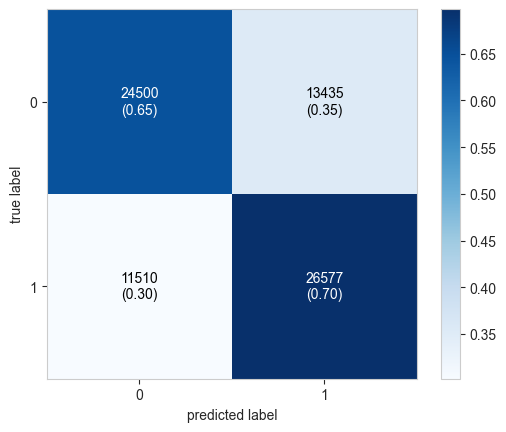

In [87]:
print('Confusion Matrix for Logistic Regression')
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [88]:
#decision tree
model_3 = DecisionTreeClassifier(max_depth = 3)
model_3.fit(X_train, y_train)
predictions = model_3.predict(X_test)

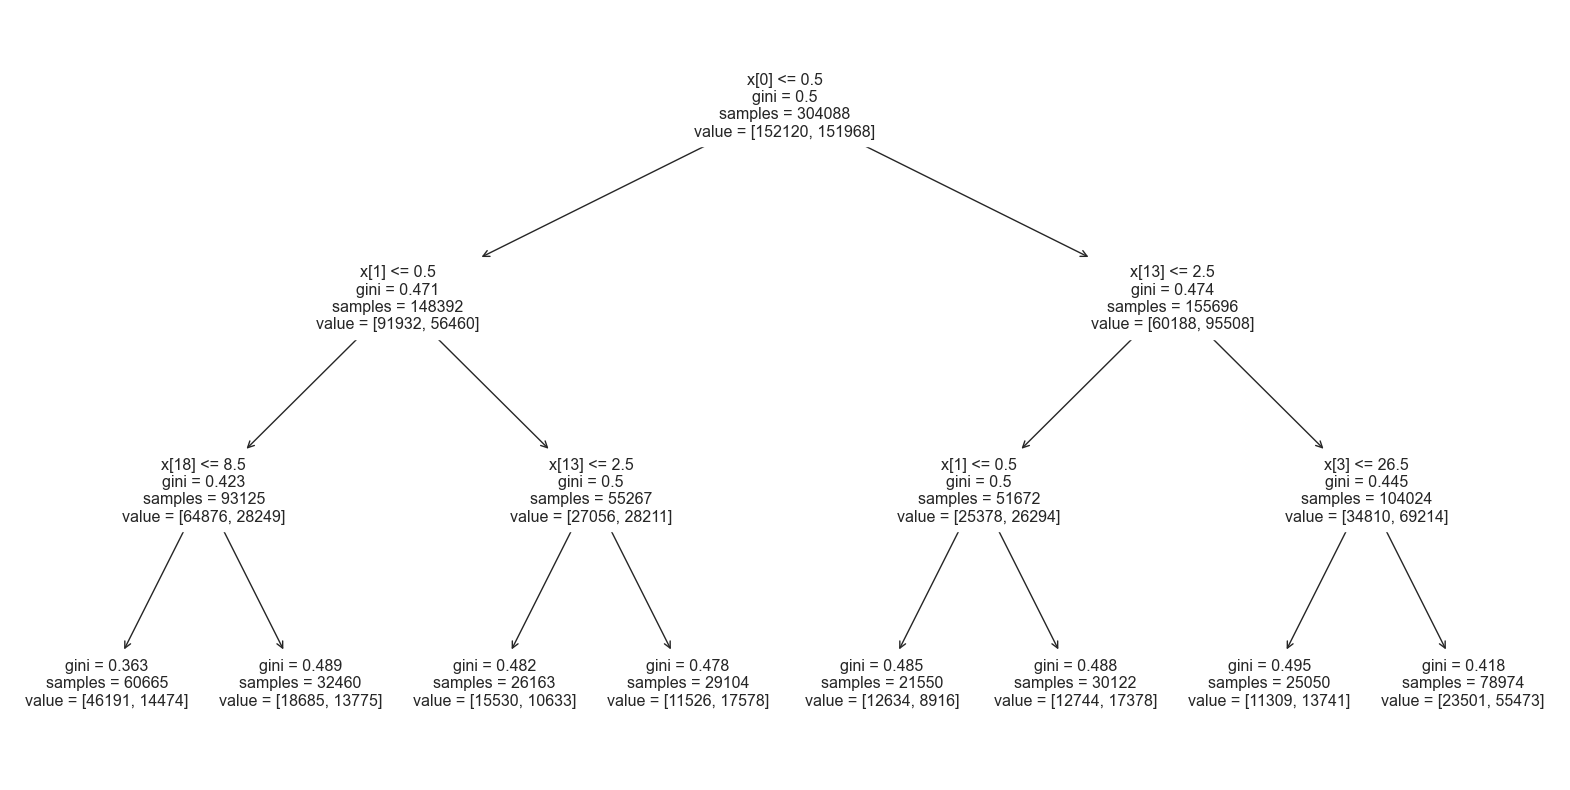

In [89]:
# plotting decision tree classifier
plt.figure(figsize = (20,10))
tree.plot_tree(model_3)
plt.show()

In [90]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
68436,0,0
81745,1,1
103109,0,1
17283,0,0
112954,1,1
...,...,...
115639,0,0
111825,1,1
188251,1,0
12763,0,0


In [91]:
accuracy_3 = accuracy_score(y_test, predictions)
accuracies['Decision Tree Classifier'] = accuracy_3
classificationreport = classification_report(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print('\nAccuracy score of Decision Tree Classifier : ' + str(round(accuracy_3*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Decision Tree Classifier : 64.72

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.66      0.61      0.63     37935
           1       0.64      0.68      0.66     38087

    accuracy                           0.65     76022
   macro avg       0.65      0.65      0.65     76022
weighted avg       0.65      0.65      0.65     76022


**************************************************

Mean squared error : 0.3527531504038305

**************************************************

Root mean squared error : 0.5939302571883592


Confusion Matrix for Decision Tree Classifier


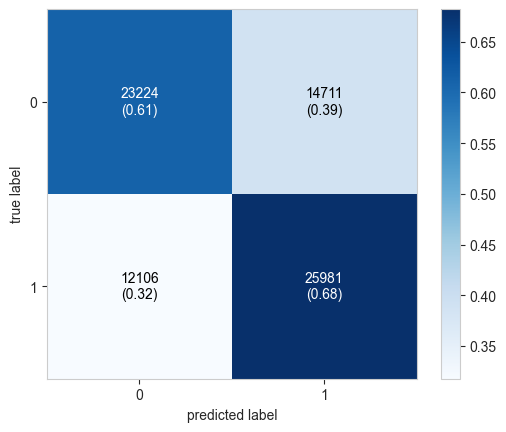

In [92]:
print('Confusion Matrix for Decision Tree Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [93]:
model_4 = KNeighborsClassifier(n_neighbors = 5, p = 2)
model_4.fit(X_train, y_train)
predictions = model_4.predict(X_test)

In [94]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
68436,0,0
81745,1,1
103109,0,0
17283,0,0
112954,1,1
...,...,...
115639,0,0
111825,1,1
188251,1,1
12763,0,0


In [95]:
accuracy_4 = accuracy_score(y_test, predictions)
accuracies['KNeighborsClassifier'] = accuracy_4
classificationreport = classification_report(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print('\nAccuracy score of K - Nearest Neighbors : ' + str(round(accuracy_4*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of K - Nearest Neighbors : 92.54

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     37935
           1       0.87      1.00      0.93     38087

    accuracy                           0.93     76022
   macro avg       0.93      0.93      0.92     76022
weighted avg       0.93      0.93      0.92     76022


**************************************************

Mean squared error : 0.07464944358212096

**************************************************

Root mean squared error : 0.2732205035902704


Confusion Matrix for K - Nearest Neighbors


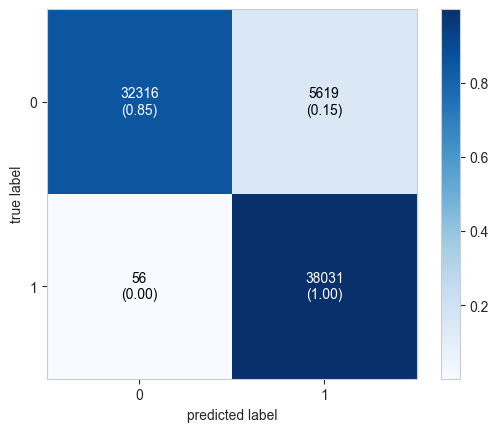

In [96]:
print('Confusion Matrix for K - Nearest Neighbors')
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

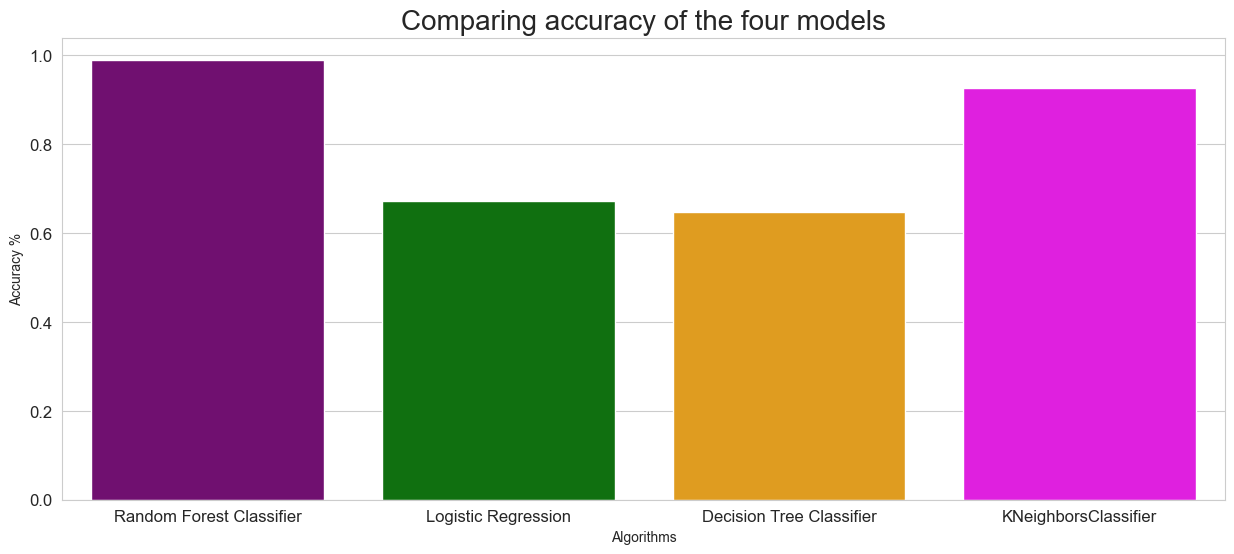

In [97]:
colors = ["purple", "green", "orange", "magenta"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()

In [98]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

,Model,Accuracy
0,Random Forest Classifier,0.990148
3,KNeighborsClassifier,0.925351
1,Logistic Regression,0.671871
2,Decision Tree Classifier,0.647247


In [99]:
# Creating a pickle file for the classifier
import pickle
filename = 'ddiabetes_rfc.pkl'
pickle.dump(model_1, open(filename, 'wb'))